<a href="https://colab.research.google.com/github/nissimlab/scRNA-seq-fixed-pancreas/blob/main/figures_plotting/Plotting_secretory_acinar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Acinar subset and analysis --> trajectory analysis
# Run 20230415
# Sup Figure 3B-C


In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


#Colab

In [ ]:
!pip install setuptools-scm scanpy bbknn anndata leidenalg scrublet watermark pandas===1.5.3 umap-learn==0.5.3 plotnine==0.8.0 anndata panel muon anndata2ri triku ray harmonypy rpy2==3.4.5 infercnvpy matplotlib==3.5.3 scvelo==0.2.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 78.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.0/103.0 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 68.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 12.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 94.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.5/291.5 kB 36.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 MB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 24.9 MB/s eta 0:00:00
  P

In [ ]:
!pip install triku harmonypy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install matplotlib==3.4.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.1/37.1 MB 36.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for matplotlib: filename=matplotlib-3.4.0-cp310-cp310-linux_x86_64.whl size=10514161 sha256=57c84920ce84a7e825dfe5467aa02c4b71c94236a31e4a8194d59551b16f4c84
  Stored in directory: /root/.cache/pip/wheels/27/ea/35/0964d59ed4c7270bbeabc79c0984b58d72f9e4463746bf7062
Successfully built matplotlib
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.3
    Uninstalling matplotlib-3.5.3:
      Successfully uninstalled matplotlib-3.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mizani 0.8.1 requires matplotlib>=3.5.0, but you have matplotlib 3.4.0 which is incompatible.


In [ ]:
!sudo apt-get install -y libharfbuzz-dev libharfbuzz-dev libfribidi-dev libcairo2-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  gir1.2-harfbuzz-0.0 libblkid-dev libcairo-script-interpreter2 libffi-dev
  libglib2.0-dev libglib2.0-dev-bin libgraphite2-dev libharfbuzz-gobject0
  libharfbuzz-icu0 liblzo2-2 libmount-dev libpixman-1-dev libselinux1-dev
  libsepol1-dev libxcb-render0-dev libxcb-shm0-dev
Suggested packages:
  libcairo2-doc libgirepository1.0-dev libglib2.0-doc libgdk-pixbuf2.0-bin
  | libgdk-pixbuf2.0-dev libxml2-utils libgraphite2-utils
The following NEW packages will be installed:
  gir1.2-harfbuzz-0.0 libblkid-dev libcairo-script-interpreter2 libcairo2-dev
  libffi-dev libfribidi-dev libglib2.0-dev libglib2.0-dev-bin libgraphite2-dev
  libharfbuzz-dev libharfbuzz-gobject0 libharfbuzz-icu0 liblzo2-2 libmount-dev
  libpixman-1-dev libselinux1-dev libsepol1-dev libxcb-render0-dev
  libxcb-shm0-dev
0 upgraded, 19 newly installed, 0 to remove and 34 not up

In [ ]:
!sudo apt-get update

Hit:1 http://archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Get:5 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Get:9 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 Packages [2,345 kB]
Hit:10 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:11 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [2,772 kB]
Get:12 http://archive.ubuntu.com/ubuntu focal-updates/restricted amd64 Packages [2,483 kB]
Get:13 http://security.ubuntu.com/ubuntu focal-security/universe a

In [ ]:
!sudo apt-get install msttcorefonts -qq

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 17.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package libmspack0:amd64.
(Reading database ... 123426 files and directories currently installed.)
Preparing to unpack .../00-libmspack0_0.10.1-2_amd64.deb ...
Unpacking libmspack0:amd64 (0.10.1-2) ...
Selecting previously unselected package cabextract.
Preparing to unpack .../01-cabextract_1.9-3_amd64.deb ...
Unpacking cabextract (1.9-3) ...
Selecting previously unselected package libfontenc1:amd64.
Preparing to unpack .../02-libfontenc1_1%3a1.1.4-0ubuntu1_amd64.deb ...
Unpacking libfontenc1:amd64 (1:1.1.4-0ubun

In [ ]:
!sudo apt install font-manager

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  font-manager-common font-viewer
Suggested packages:
  file-roller nautilus-font-manager nemo-font-manager yelp
The following NEW packages will be installed:
  font-manager font-manager-common font-viewer
0 upgraded, 3 newly installed, 0 to remove and 44 not upgraded.
Need to get 1,740 kB of archives.
After this operation, 9,394 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 font-manager-common amd64 0.7.7-0.3 [1,545 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 font-viewer amd64 0.7.7-0.3 [27.9 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 font-manager amd64 0.7.7-0.3 [168 kB]
Fetched 1,740 kB in 1s (2,151 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot b

In [ ]:
!pip install matplotlib==3.5.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 72.3 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.4.0
    Uninstalling matplotlib-3.4.0:
      Successfully uninstalled matplotlib-3.4.0


#Load font

In [ ]:
!rm ~/.cache/matplotlib -rf

In [ ]:
import matplotlib.font_manager as fm

In [ ]:
print(fm.findfont('Arial'))

/usr/share/fonts/truetype/msttcorefonts/Arial.ttf


## Load packages

In [ ]:
import sys
sys.path.append('/usr/local/lib/python3.9/site-packages/')


import scanpy as sc
import numpy as np
import re
import os
import pandas as pd
import seaborn as sb
import matplotlib
import matplotlib.pyplot as pl
import scanpy.external as sce
from matplotlib import colors
import bbknn
import scvelo as scv
import scanpy as sc
import numpy as np
import loompy
import triku as tk
import seaborn as sns

sc._settings.ScanpyConfig.n_jobs=8

scv.settings.verbosity = 3
scv.settings.set_figure_params('scvelo')


# Only needed for visualization:
import matplotlib.pyplot as pl

pl.rcParams['pdf.fonttype'] = 'truetype'
sc.set_figure_params(vector_friendly=False,dpi_save=300,transparent=True)
pl.rcParams['lines.linewidth'] = 0.1
sc.set_figure_params(color_map='viridis')
colorsComb = np.vstack([pl.cm.Reds(np.linspace(0, 1, 10)), pl.cm.Greys_r(np.linspace(0.7, 0.8, 0))])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)

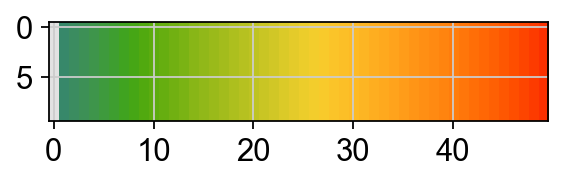

In [ ]:
import colorcet as cc

xs, _ = np.meshgrid(np.linspace(0, 1, 50), np.linspace(0, 1, 10))
colorsComb = np.vstack([pl.cm.Greys_r(np.linspace(0.8,0.1, 1)), cc.cm.rainbow_bgyr_35_85_c72(np.linspace(0.2,1, 100))])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)
pl.imshow(xs, cmap=mymap);  # use tab completion to choose

In [ ]:
%load_ext watermark
%watermark
%watermark --iversions -v -m -p numpy,scipy,sklearn,anndata,cellrank,scvelo

Last updated: 2023-06-01T16:57:22.679790+00:00

Python implementation: CPython
Python version       : 3.10.11
IPython version      : 7.34.0

Compiler    : GCC 9.4.0
OS          : Linux
Release     : 5.15.107+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit

Python implementation: CPython
Python version       : 3.10.11
IPython version      : 7.34.0

numpy   : 1.22.4
scipy   : 1.10.1
sklearn : 1.2.2
anndata : 0.9.1
cellrank: not installed
scvelo  : 0.2.4

Compiler    : GCC 9.4.0
OS          : Linux
Release     : 5.15.107+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit

scanpy    : 1.9.3
scvelo    : 0.2.4
seaborn   : 0.12.2
matplotlib: 3.5.0
bbknn     : 1.5.1
sys       : 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
triku     : 2.1.6
numpy     : 1.22.4
colorcet  : 3.0.1
pandas    : 1.5.3
re        : 2.2.1
loompy    : 3.0.7



In [ ]:
%cd /content/

/content


# Setup data directory

In [ ]:
folder = "/content/drive/MyDrive/CIP_v3_data/CIP_all/Acinar/"

if not os.path.exists(folder):
    os.makedirs(folder)

samplename='CIP_all_v3_AcinarDuctal'
random_state=42

import os
os.chdir(folder)
if not os.path.exists('./figures/'):
    os.makedirs('./figures/')

if not os.path.exists('./markers/'):
    os.makedirs('./markers/')

#Load in adata

In [ ]:
#adata=sc.read(samplename+'_acinar_velocity_annotated_20230415.h5ad')

In [ ]:
#scVelo merged
adata=sc.read('CIP_v3_acinarductal_loom_20230302.h5ad')

In [ ]:
#Acinar
adata= adata[~adata.obs['annotated'].isin(['Ductal']),:].copy()
adata

AnnData object with n_obs × n_vars = 15333 × 18322
    obs: 'sample', 'donor', 'date', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'scDblFinder_class', 'doublet_score', 'predicted_doublet', 'batch', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'pct_counts_rb', 'QC', 'outlier', 'S_score', 'G2M_score', 'phase', 'leiden_r0.8', 'leiden_r0.5', 'leiden_r0.4', 'ADM', 'Acinar', 'Ductal', 'annotated', 'annotated_fine', 'annotated_ADM', 'annotated_immunegrouped', 'sample_batch', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'annotated2', 'velocity_self_transition'
    var: 'feature_type', 'id', 'mito', 'n_cells', 'mt', 'rb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total


# log1p proportional fitting


In [ ]:
adata.layers["counts"] = adata.layers['cellbender']
adata.X=adata.layers["counts"]
adata.layers["log_norm"]=sc.pp.log1p(sc.pp.normalize_total(adata,inplace=False,target_sum=1e4)["X"])
# proportional fitting to mean of cell depth
proportional_fitting = sc.pp.normalize_total(adata, target_sum=None, inplace=False)
# log1p transform
adata.layers["log1pPF_normalization"] = sc.pp.log1p(proportional_fitting["X"])

In [ ]:
adata.layers["PFlog1pPF_normalization"] = sc.pp.normalize_total(adata, target_sum=None, layer="log1pPF_normalization", inplace=False)["X"]

#Define acinar-s

In [ ]:
adata.obs['annotated'] = adata.obs['annotated'].cat.add_categories(['ADM-early','ADM-late'])

adata.obs['annotated'][np.in1d(adata.obs['annotated'],  ['ADM early'])] = 'ADM-early'
adata.obs['annotated'][np.in1d(adata.obs['annotated'],  ['ADM late'])] = 'ADM-late'


adata.obs['annotated'] = adata.obs['annotated'].cat.remove_unused_categories()

adata.X=adata.layers['PFlog1pPF_normalization']

In [ ]:
adata.X=adata.layers['PFlog1pPF_normalization']

In [ ]:
# Find cells that express the gene "Ctrb1" greater than 10
high_expr_cells = adata[adata[: , 'Ctrb1'].X > 10, :]

In [ ]:
high_expr_cells=high_expr_cells.obs_names

In [ ]:
# Set their annotation to secretory Acinar
adata.obs['annotated2'] = adata.obs['annotated'].cat.add_categories(['Secretory Acinar'])
adata.obs.loc[high_expr_cells, 'annotated2'] = "Secretory Acinar"

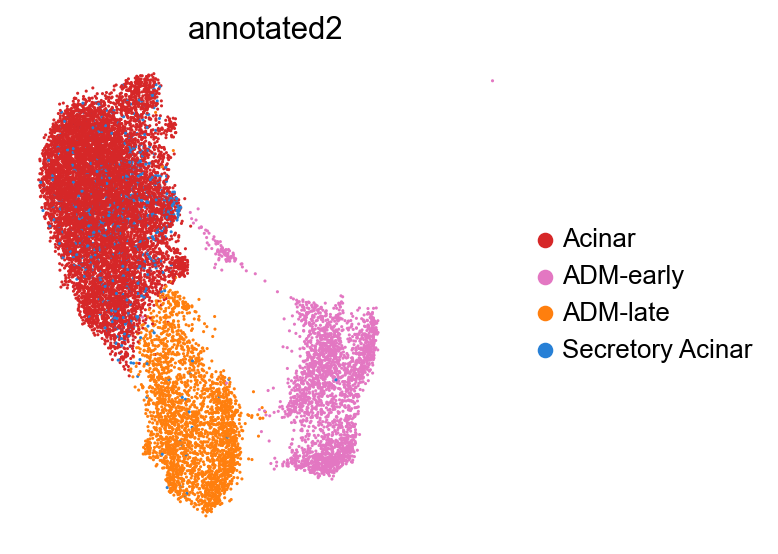

In [ ]:
sc.pl.umap(adata, color='annotated2', legend_loc='right margin',layer='PFlog1pPF_normalization',cmap=mymap,legend_fontoutline=3,vmax='p99.9',legend_fontsize='small', legend_fontweight='normal',frameon=False)

In [ ]:
adata.obs['annotated2'] = adata.obs['annotated2']


adata.obs['annotated2'] = adata.obs['annotated2'].cat.remove_unused_categories()

adata.X=adata.layers['PFlog1pPF_normalization']

In [ ]:
adata.obs['annotated2']= adata.obs['annotated2'].cat.reorder_categories(['Acinar','ADM-early','ADM-late','Secretory Acinar'])

#Colors

In [ ]:
colors=[ '#d62728',  '#e377c2', '#ff7f0e','#2780d6']

In [ ]:
fm.rcParams['font.family']=['Arial']
sb.set_context('talk')

Text(0.5, 0, 'UMAP1')

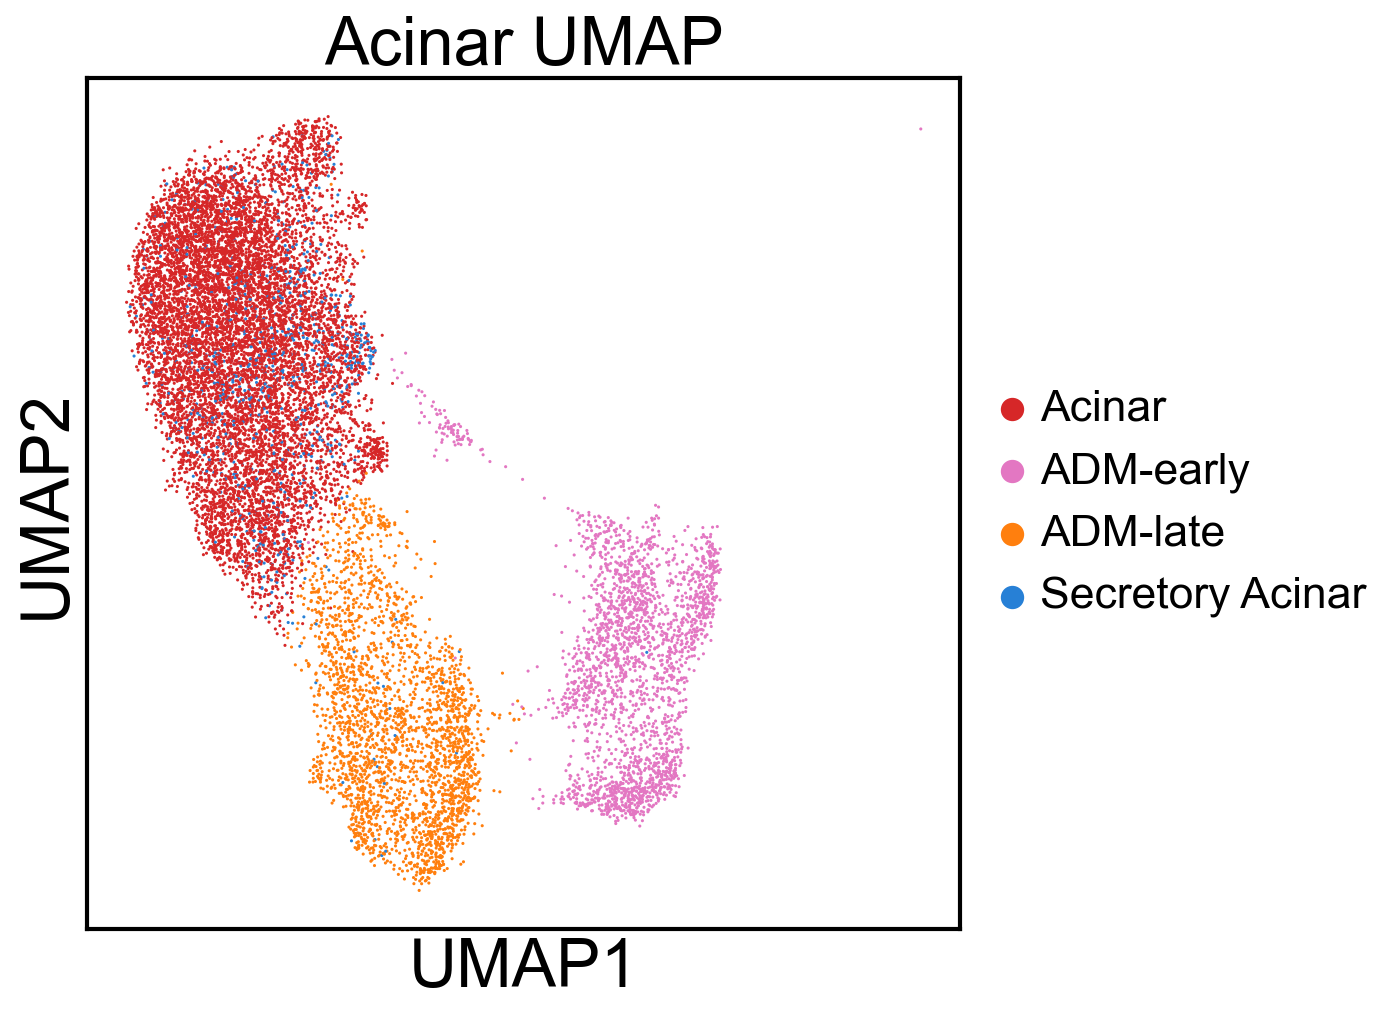

In [ ]:
sb.set_context('talk')
pl.rcParams['figure.figsize']=(7,7)
ax1=sc.pl.umap(adata, color=['annotated2'], palette=colors,legend_loc='right margin',legend_fontoutline=3,vmax='p99.9',legend_fontsize=20, legend_fontweight='normal',frameon=True, show=False)
ax1.set_title('Acinar UMAP',fontsize=30)
ax1.set_ylabel('UMAP2',fontsize=30)
ax1.set_xlabel('UMAP1',fontsize=30)

Text(0.5, 0, '')

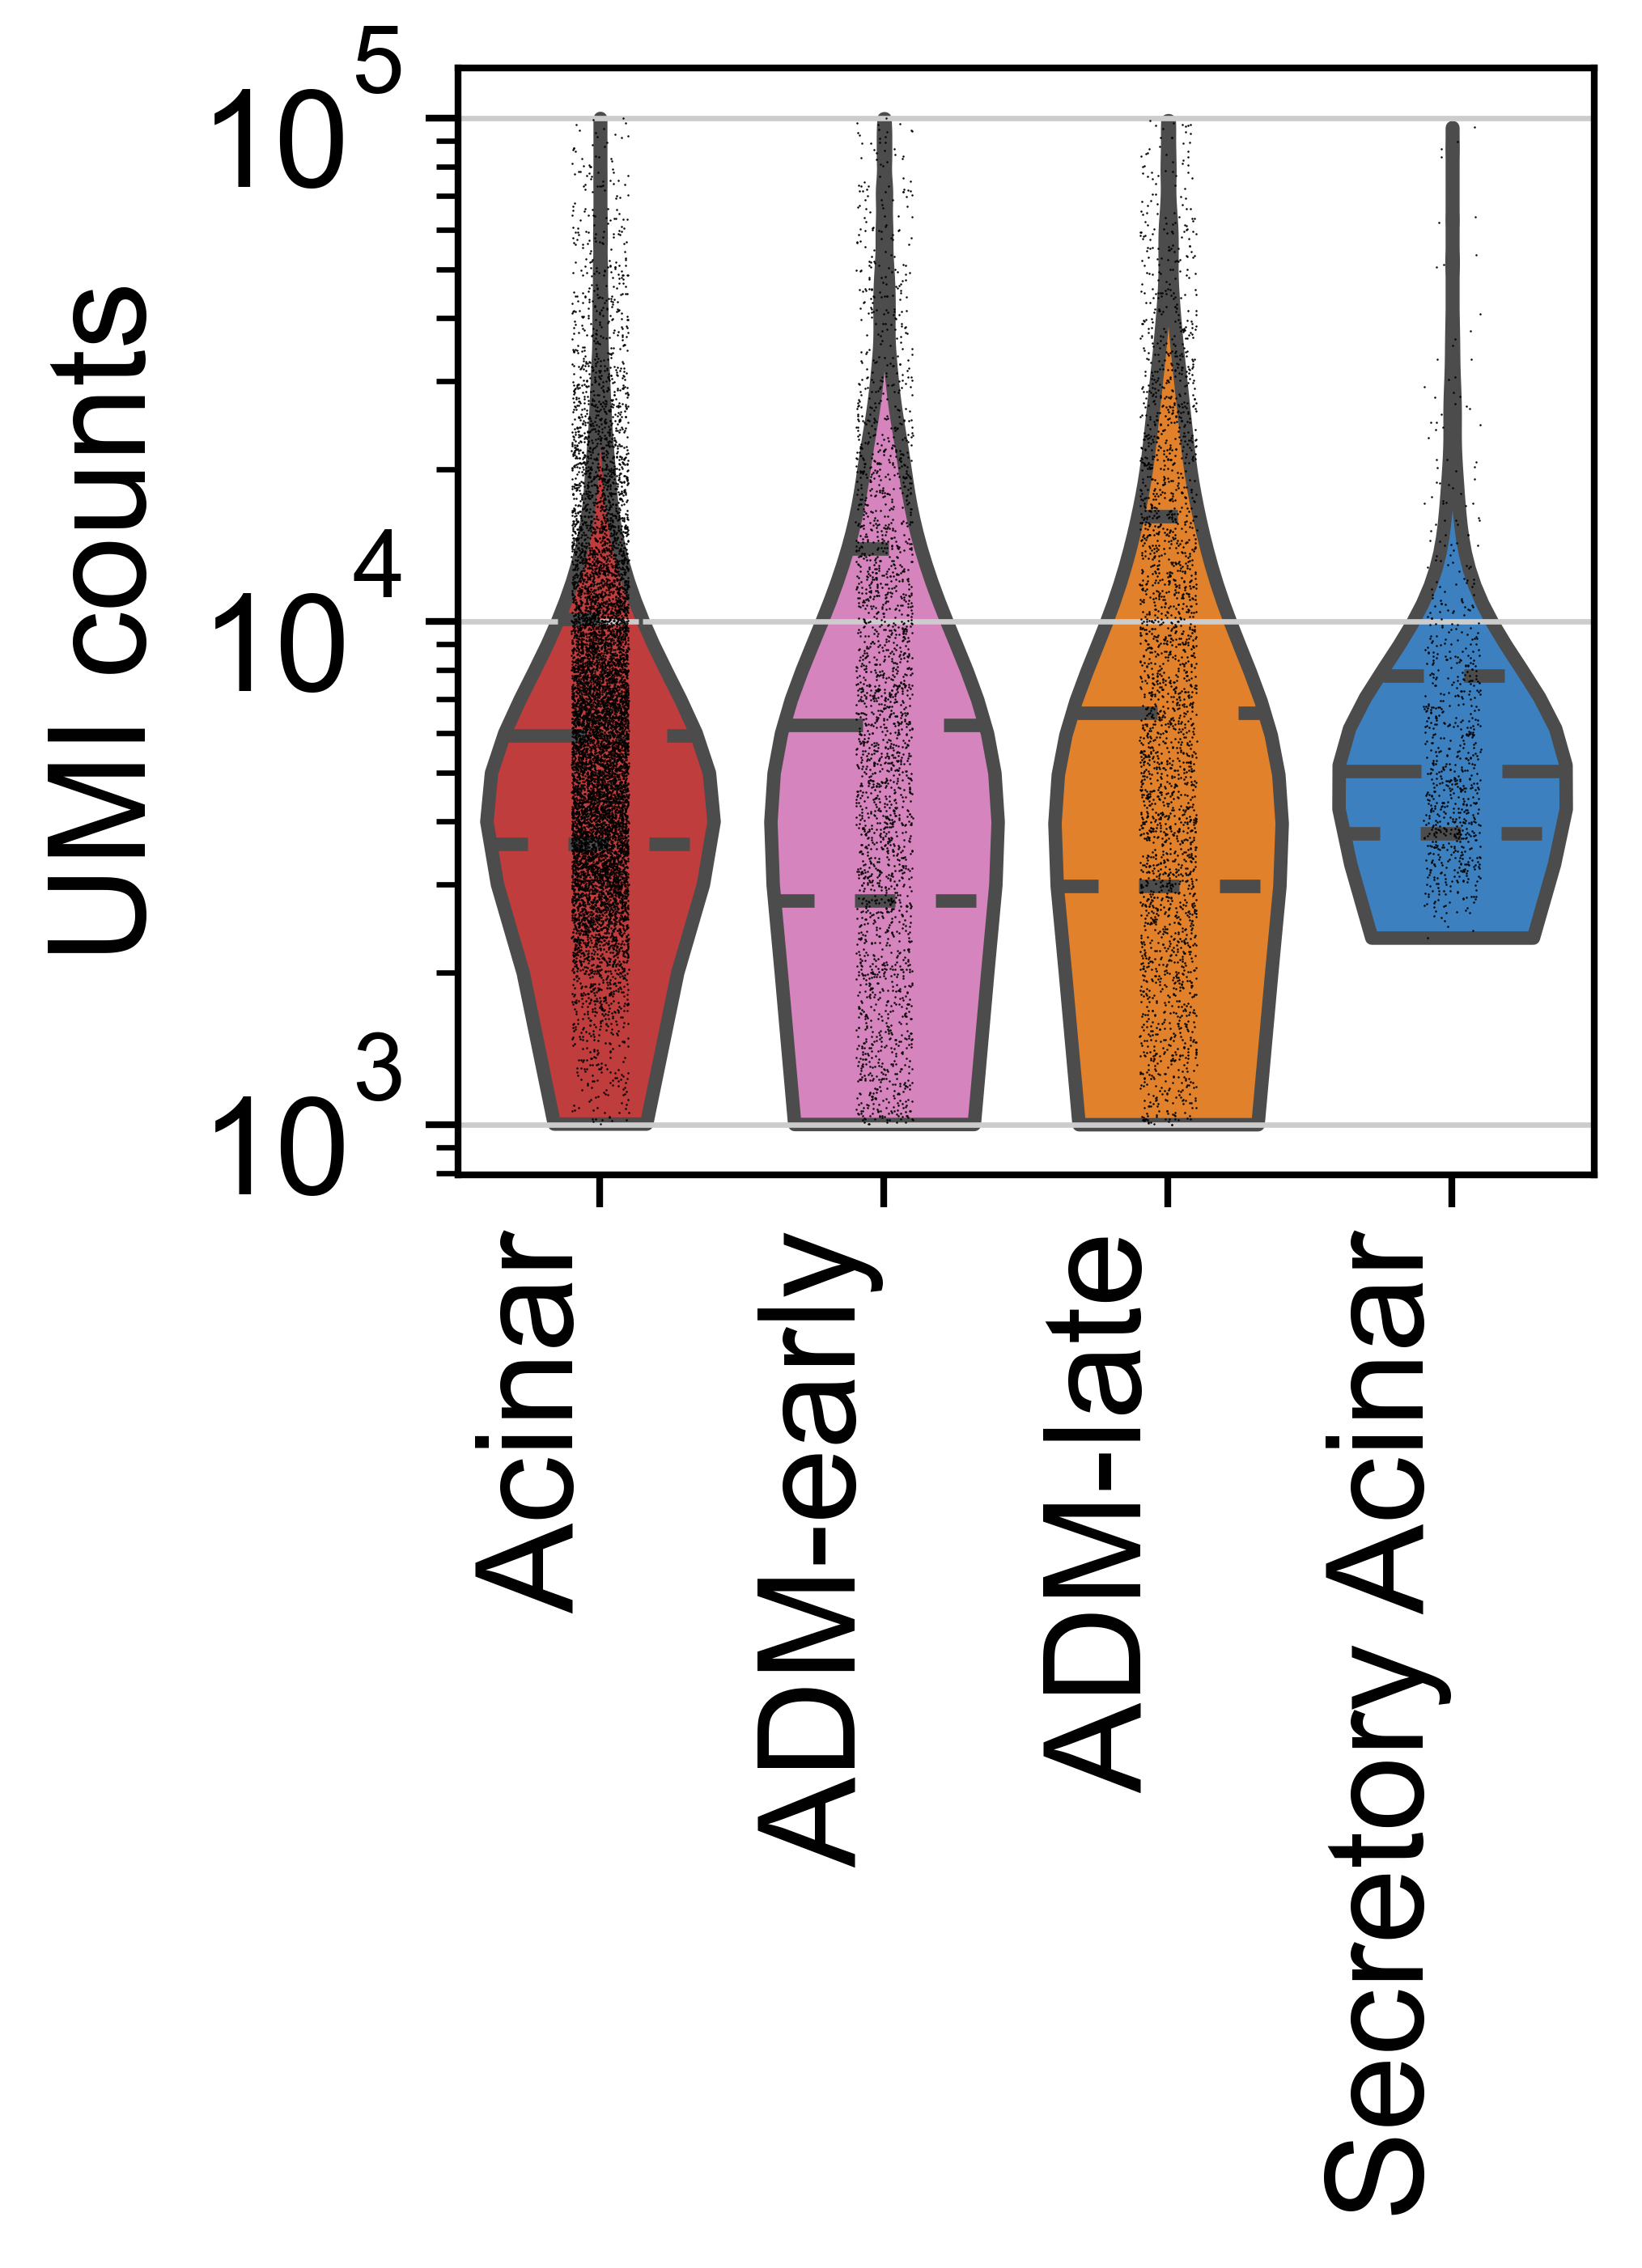

In [ ]:
sb.set_context('paper')
pl.rcParams['lines.linewidth'] = 0.1
import matplotlib.pyplot as plt
pl.rcParams['figure.dpi']=300

fig, (ax1) = plt.subplots(1, 1, figsize=(3,3 ), gridspec_kw={'wspace':0.2})

ax1 = sc.pl.violin(adata, 'n_counts', groupby='annotated2', palette=colors, jitter=0.1, linewidth=2, alpha=0.25, inner="quartile", size=0.3, log=True, cut=0, ax=ax1, show=False)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha='right')
ax1.tick_params(axis='both', which='major', labelsize=20)
ax1.set_ylabel('UMI counts',fontsize=20)
ax1.set_xlabel('')

###ridgeplots for acinar-s genes of interest

In [ ]:
adata.X=adata.layers['PFlog1pPF_normalization']

In [ ]:
adata1=adata.copy()

In [ ]:
# Convert the AnnData object to a DataFrame
df = adata1.to_df()

In [ ]:
df = adata1.obs.join(df)

In [ ]:
df_genes = df[['Ctrb1', 'Cela3b', 'Prss2', 'Cela1', 'Try4','sample','donor','Acinar','annotated2']]

In [ ]:
df_genes.columns = ['Ctrb1', 'Cela3b', 'Prss2', 'Cela1', 'Try4','sample','donor','Acinar','annotated2']

In [ ]:
df_genes

Ctrb1    Cela3b     Prss2     Cela1      Try4   sample  \
AAACCCACATGGTGGA  9.194613  7.469236  8.090376  7.219343  7.532742  Control   
AAACCCAGTAAGATCA  7.224276  5.899209  6.269803  5.880698  6.360523  Control   
AAACCCATCCCAGGCA  8.996952  7.393317  7.432347  6.980511  7.629689  Control   
AAACCCATCCGACAGC  8.137521  6.541920  7.281337  6.736200  7.417319  Control   
AAACGAAAGCCTGTCG  5.840077  4.950889  5.138730  4.910673  4.983503  Control   
...                    ...       ...       ...       ...       ...      ...   
TTTGGAGAGCGTCAAG  6.770682  5.589853  5.963141  5.646539  6.301682  Control   
TTTGGAGCAAGACTGG  7.092127  6.031528  6.905604  6.209161  6.433371  Control   
TTTGGAGCAGTTTCGA  8.690443  6.180472  8.205402  7.421368  5.336727  Control   
TTTGGAGTCGTGCAGC  6.220911  5.208826  5.437243  5.126982  4.958419  Control   
TTTGTTGCAGCTCCTT  7.482650  6.339511  7.308107  6.709297  6.112153  Control   

                      donor     Acinar annotated2  
AAACCCACATGGTGGA  control_1  29.017461     Acinar  
AAACCCAGTAAGATCA  control_1  22.472551     Acinar  
AAACCCATCCCAGGCA  control_1  28.178102     Acinar  
AAACCCATCCGACAGC  control_1  26.178375     Acinar  
AAACGAAAGCCTGTCG  control_1  18.779454     Acinar  
...                     ...        ...        ...  
TTTGGAGAGCGTCAAG  control_5  21.359432     Acinar  
TTTGGAGCAAGACTGG  control_5  22.365896     Acinar  
TTTGGAGCAGTTTCGA  control_5  24.481792     Acinar  
TTTGGAGTCGTGCAGC  control_5  19.299781     Acinar  
TTTGTTGCAGCTCCTT  control_5  24.288408     Acinar  

[15333 rows x 9 columns]

In [ ]:
plt.rcParams['figure.dpi']=200
pl.rcParams['figure.figsize']=(3,3)
fm.rcParams['font.family']=['Arial']
sb.set_context('talk')

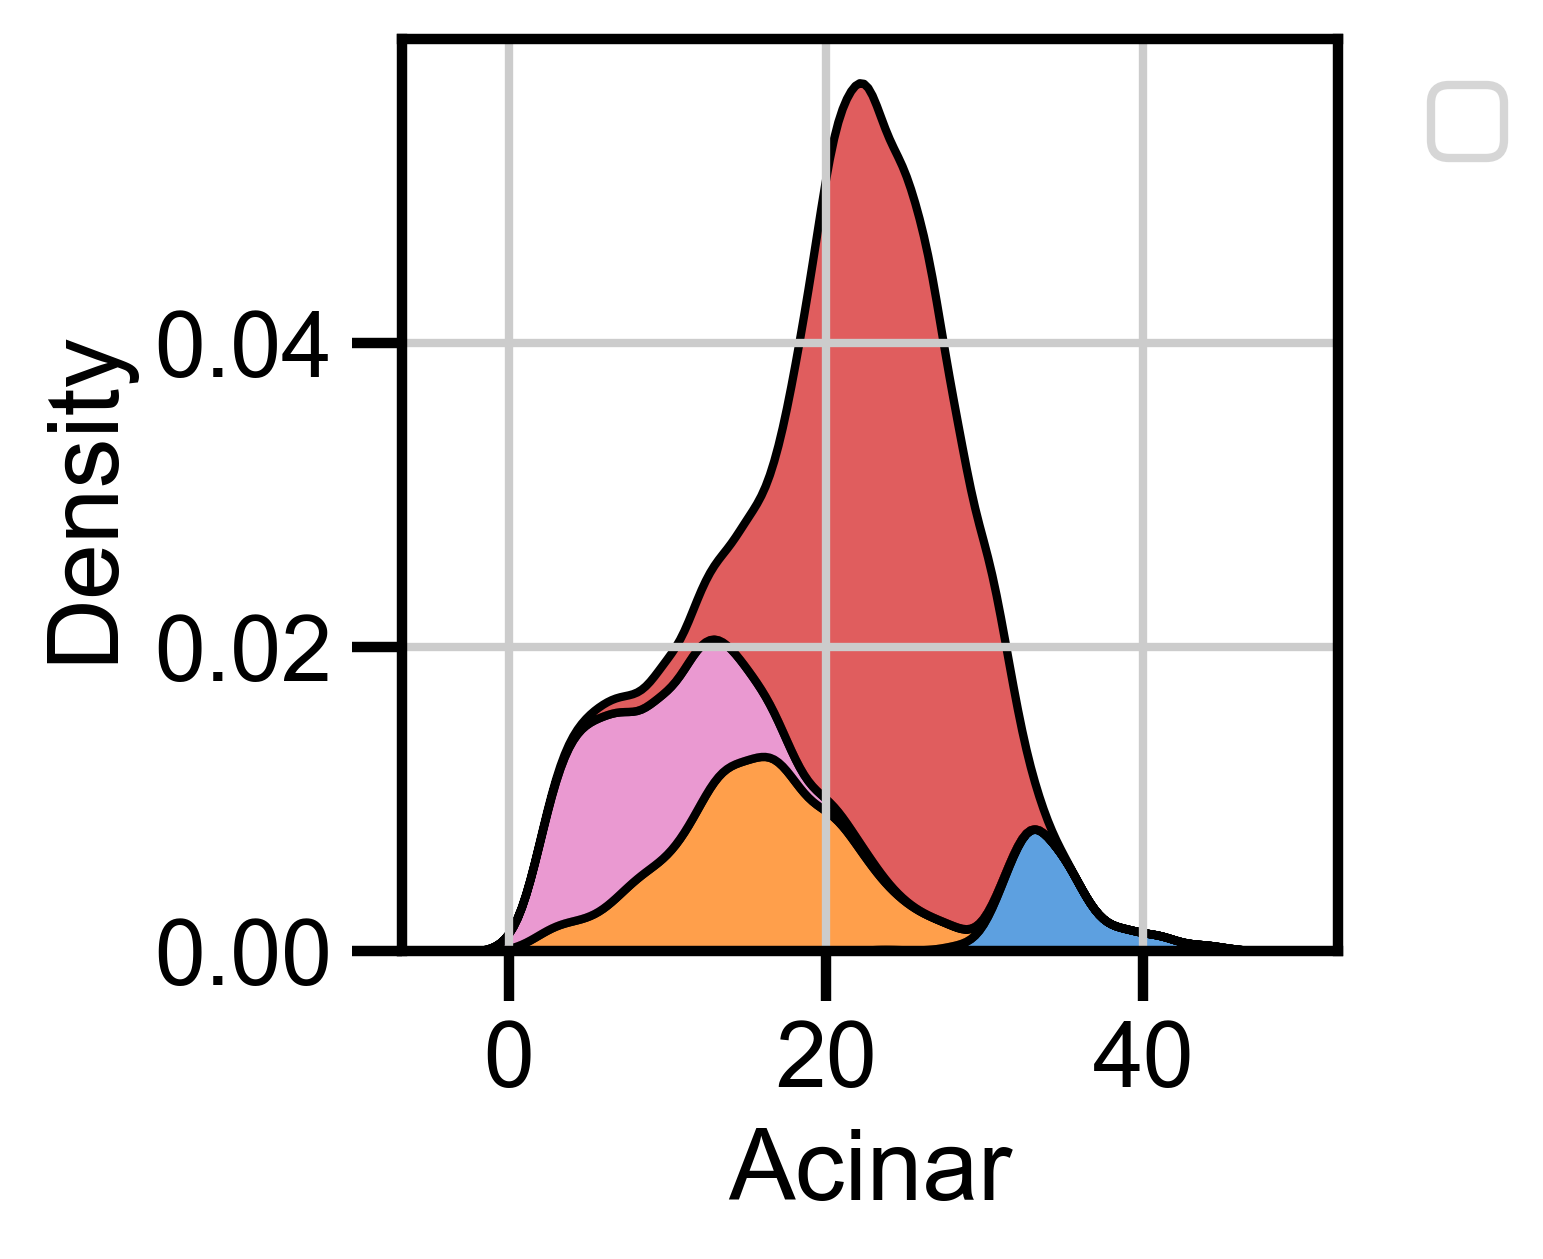

In [ ]:
ax = sns.kdeplot(data=df_genes, x='Acinar', hue='annotated2', palette=colors,multiple='stack')

# Move the legend outside the figure
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

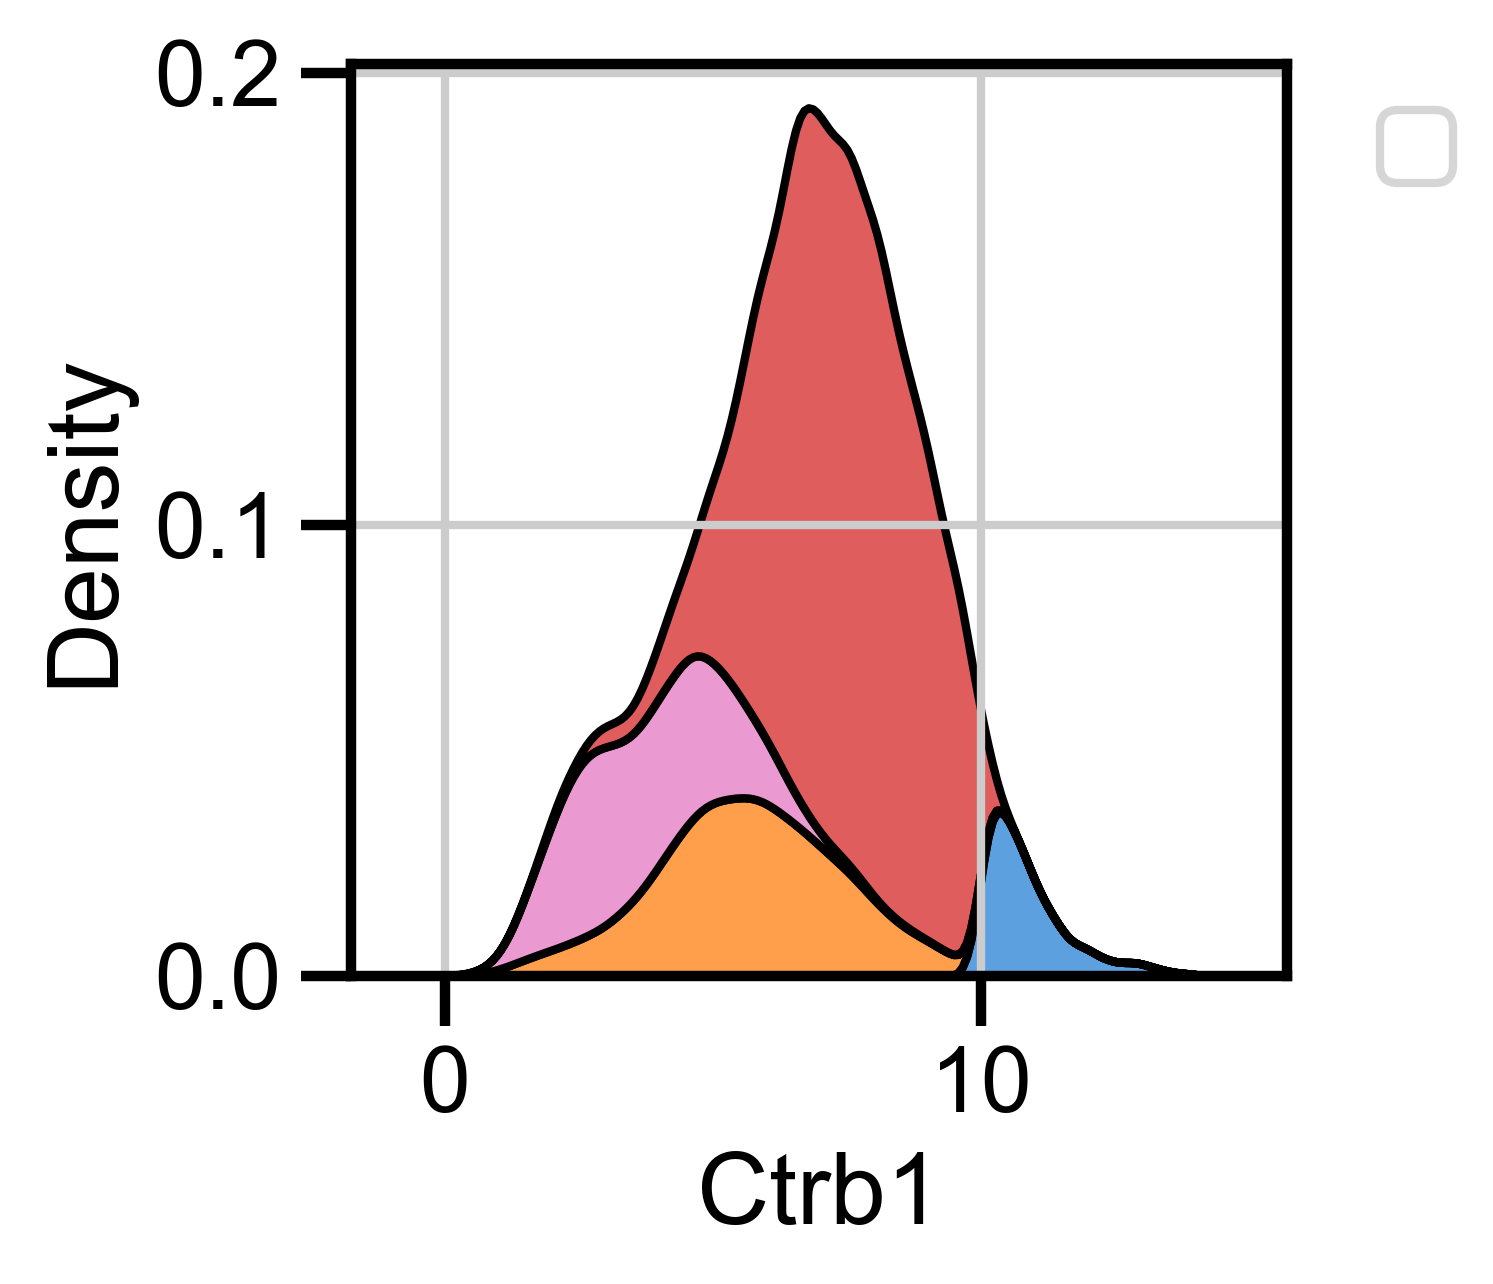

In [ ]:
ax=sns.kdeplot(data=df_genes, x='Ctrb1', hue='annotated2',palette=colors, multiple='stack')
# Move the legend outside the figure
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

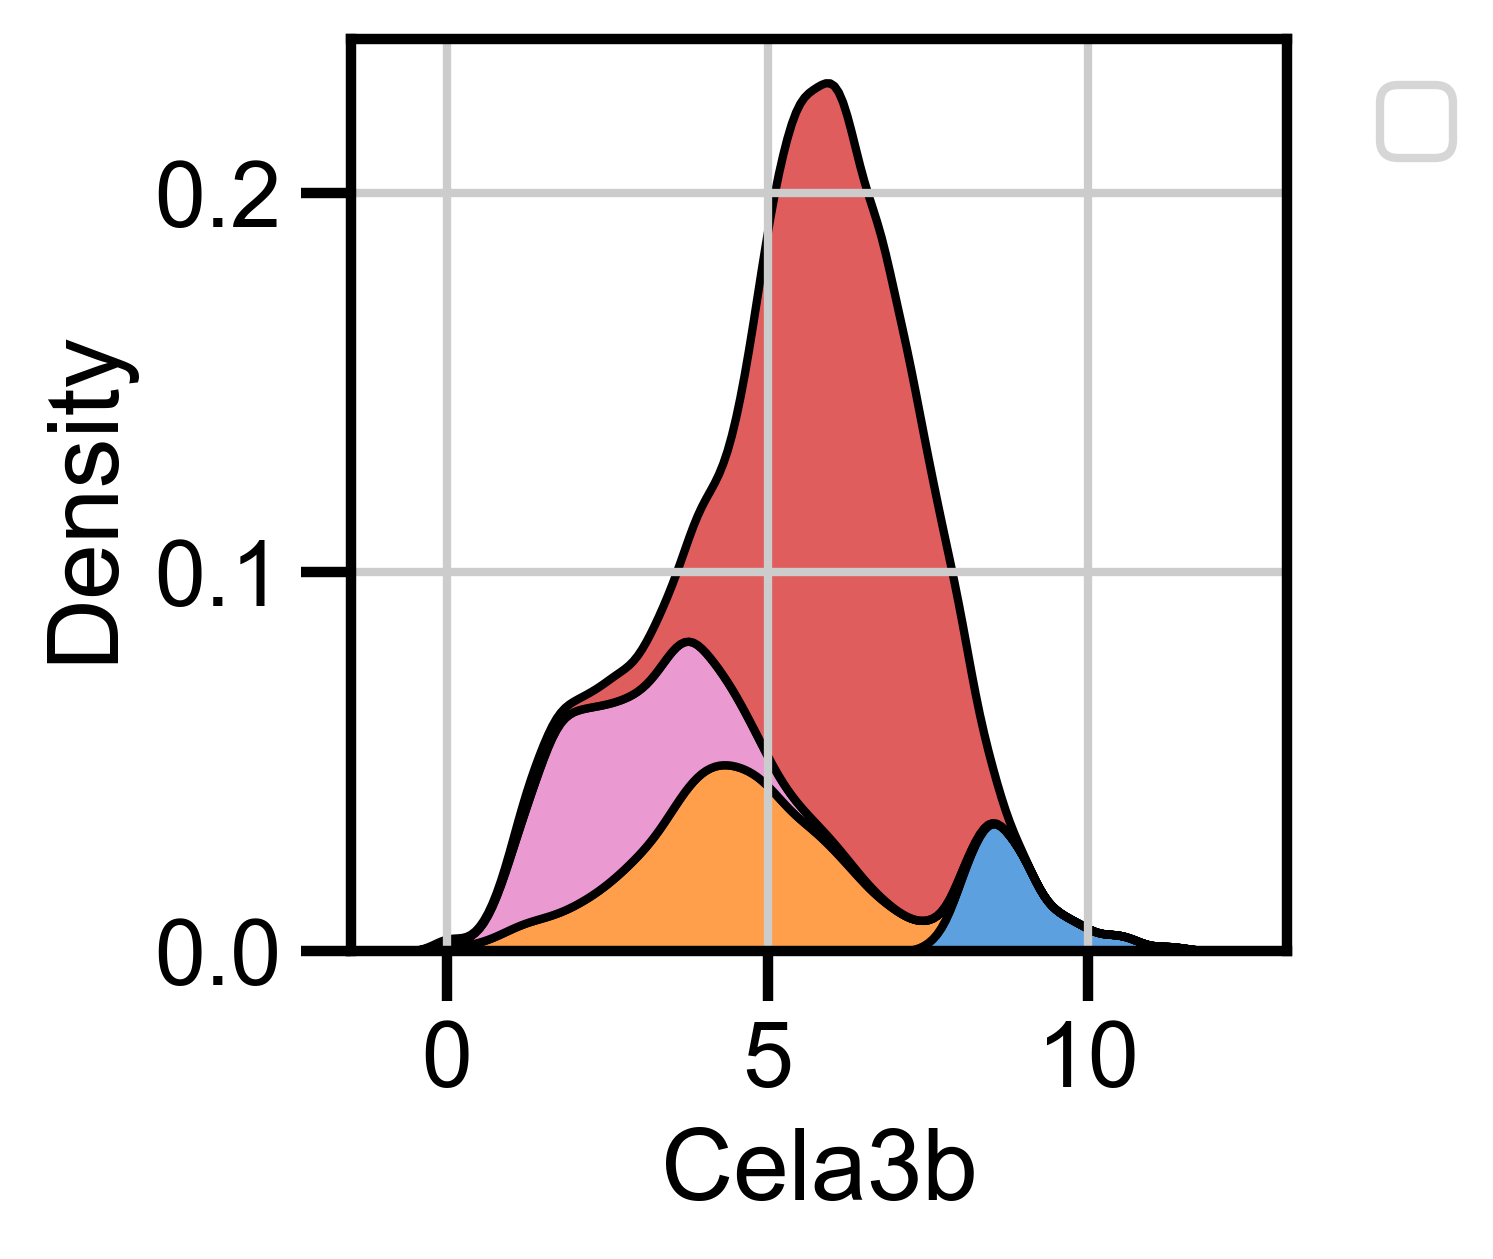

In [ ]:
ax=sns.kdeplot(data=df_genes, x='Cela3b', hue='annotated2',palette=colors, multiple='stack')
# Move the legend outside the figure
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

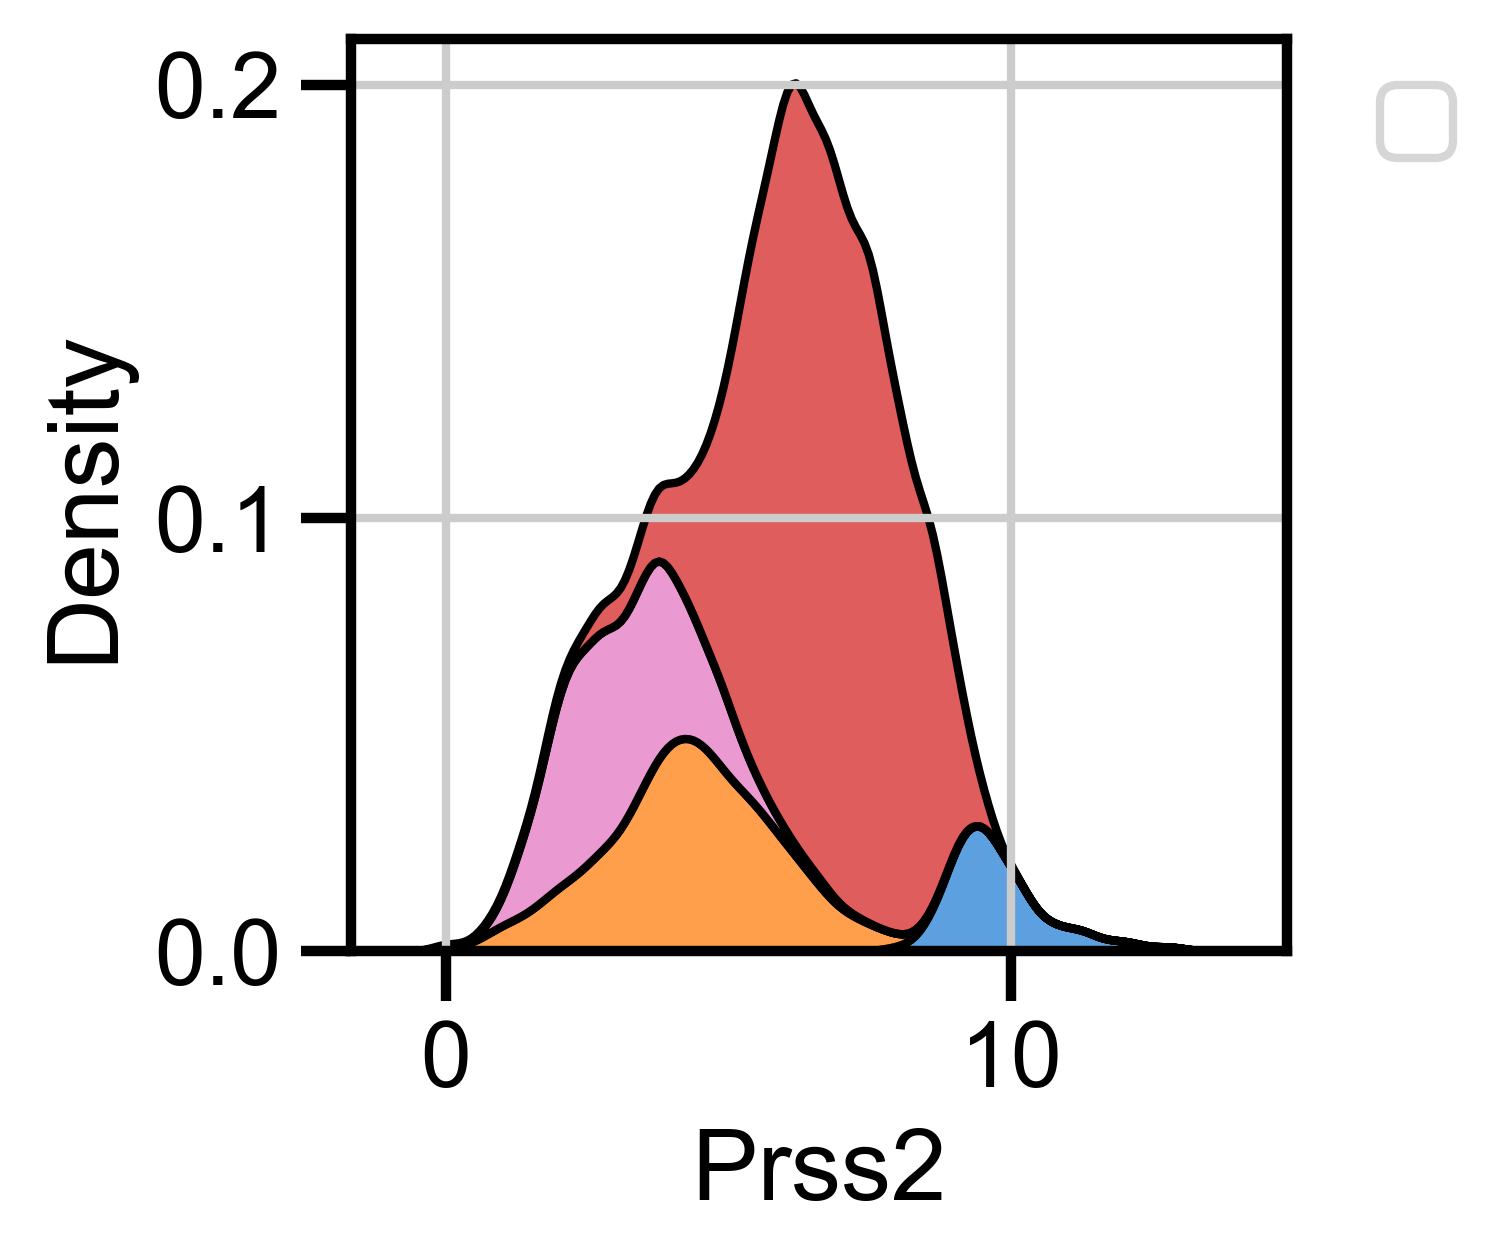

In [ ]:
ax=sns.kdeplot(data=df_genes, x='Prss2', hue='annotated2',palette=colors, multiple='stack')
# Move the legend outside the figure
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

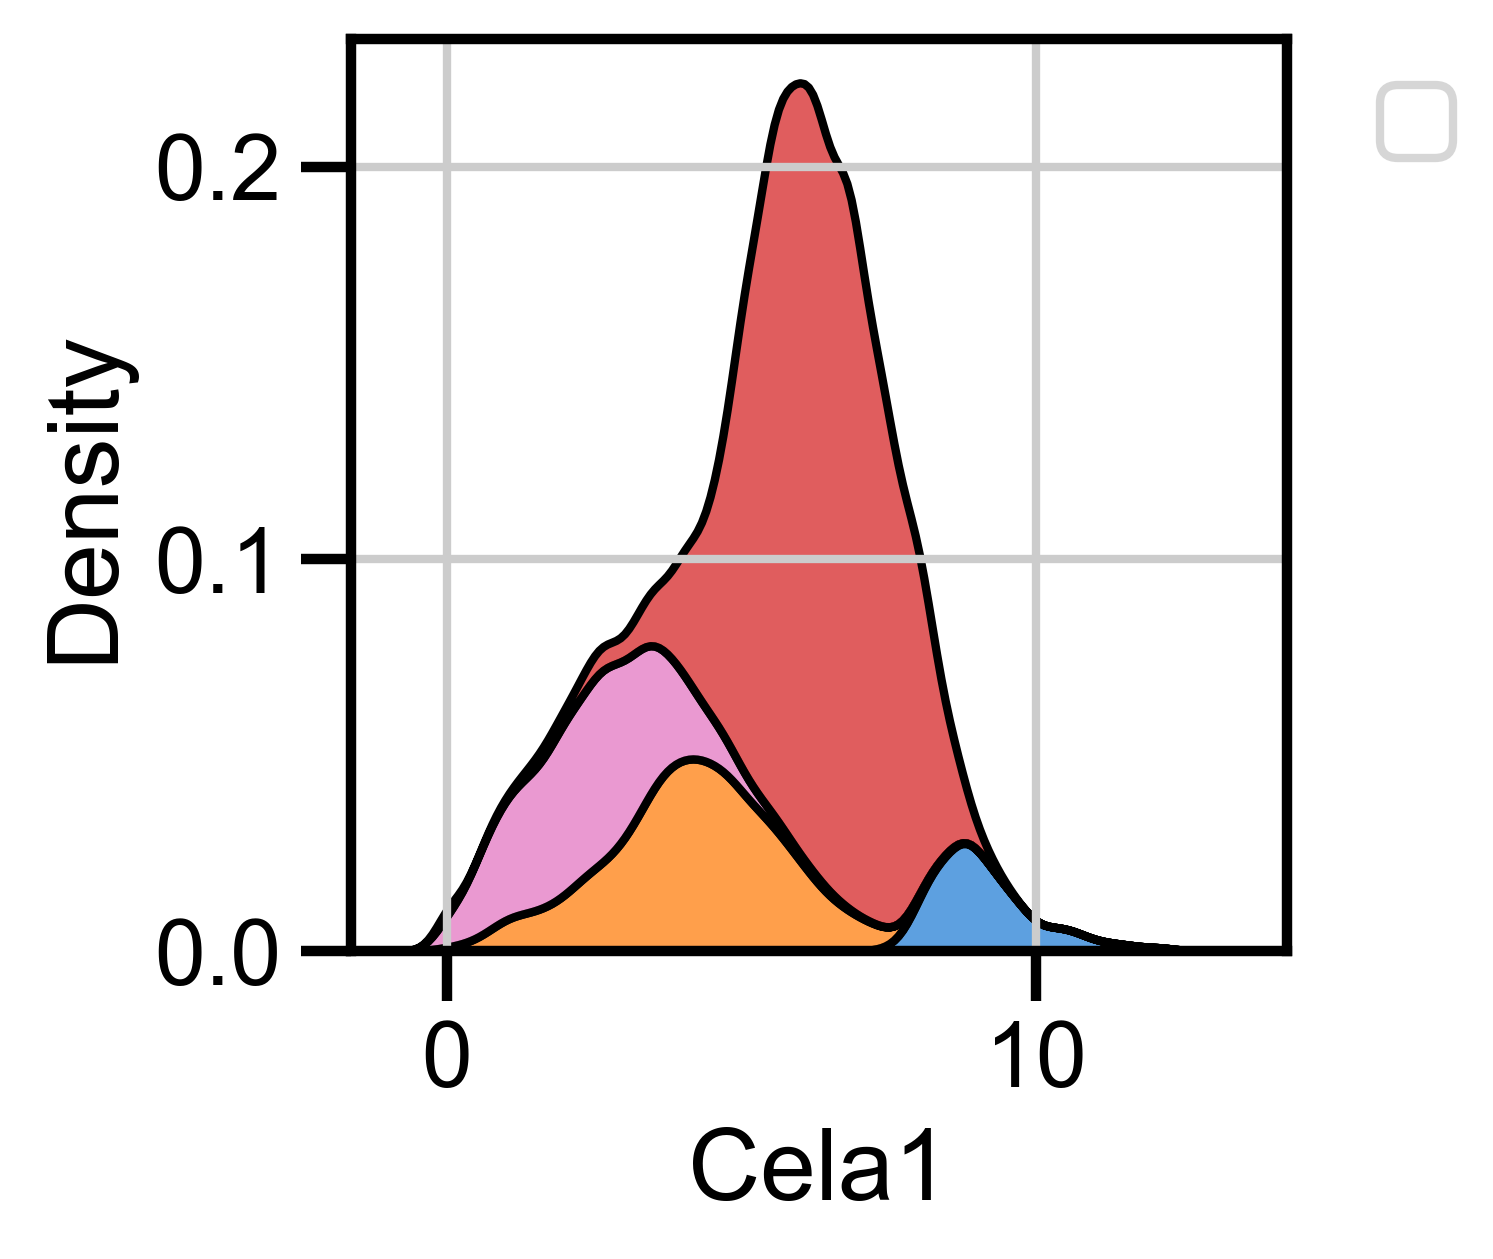

In [ ]:
ax=sns.kdeplot(data=df_genes, x='Cela1', hue='annotated2',palette=colors,multiple='stack')
# Move the legend outside the figure
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

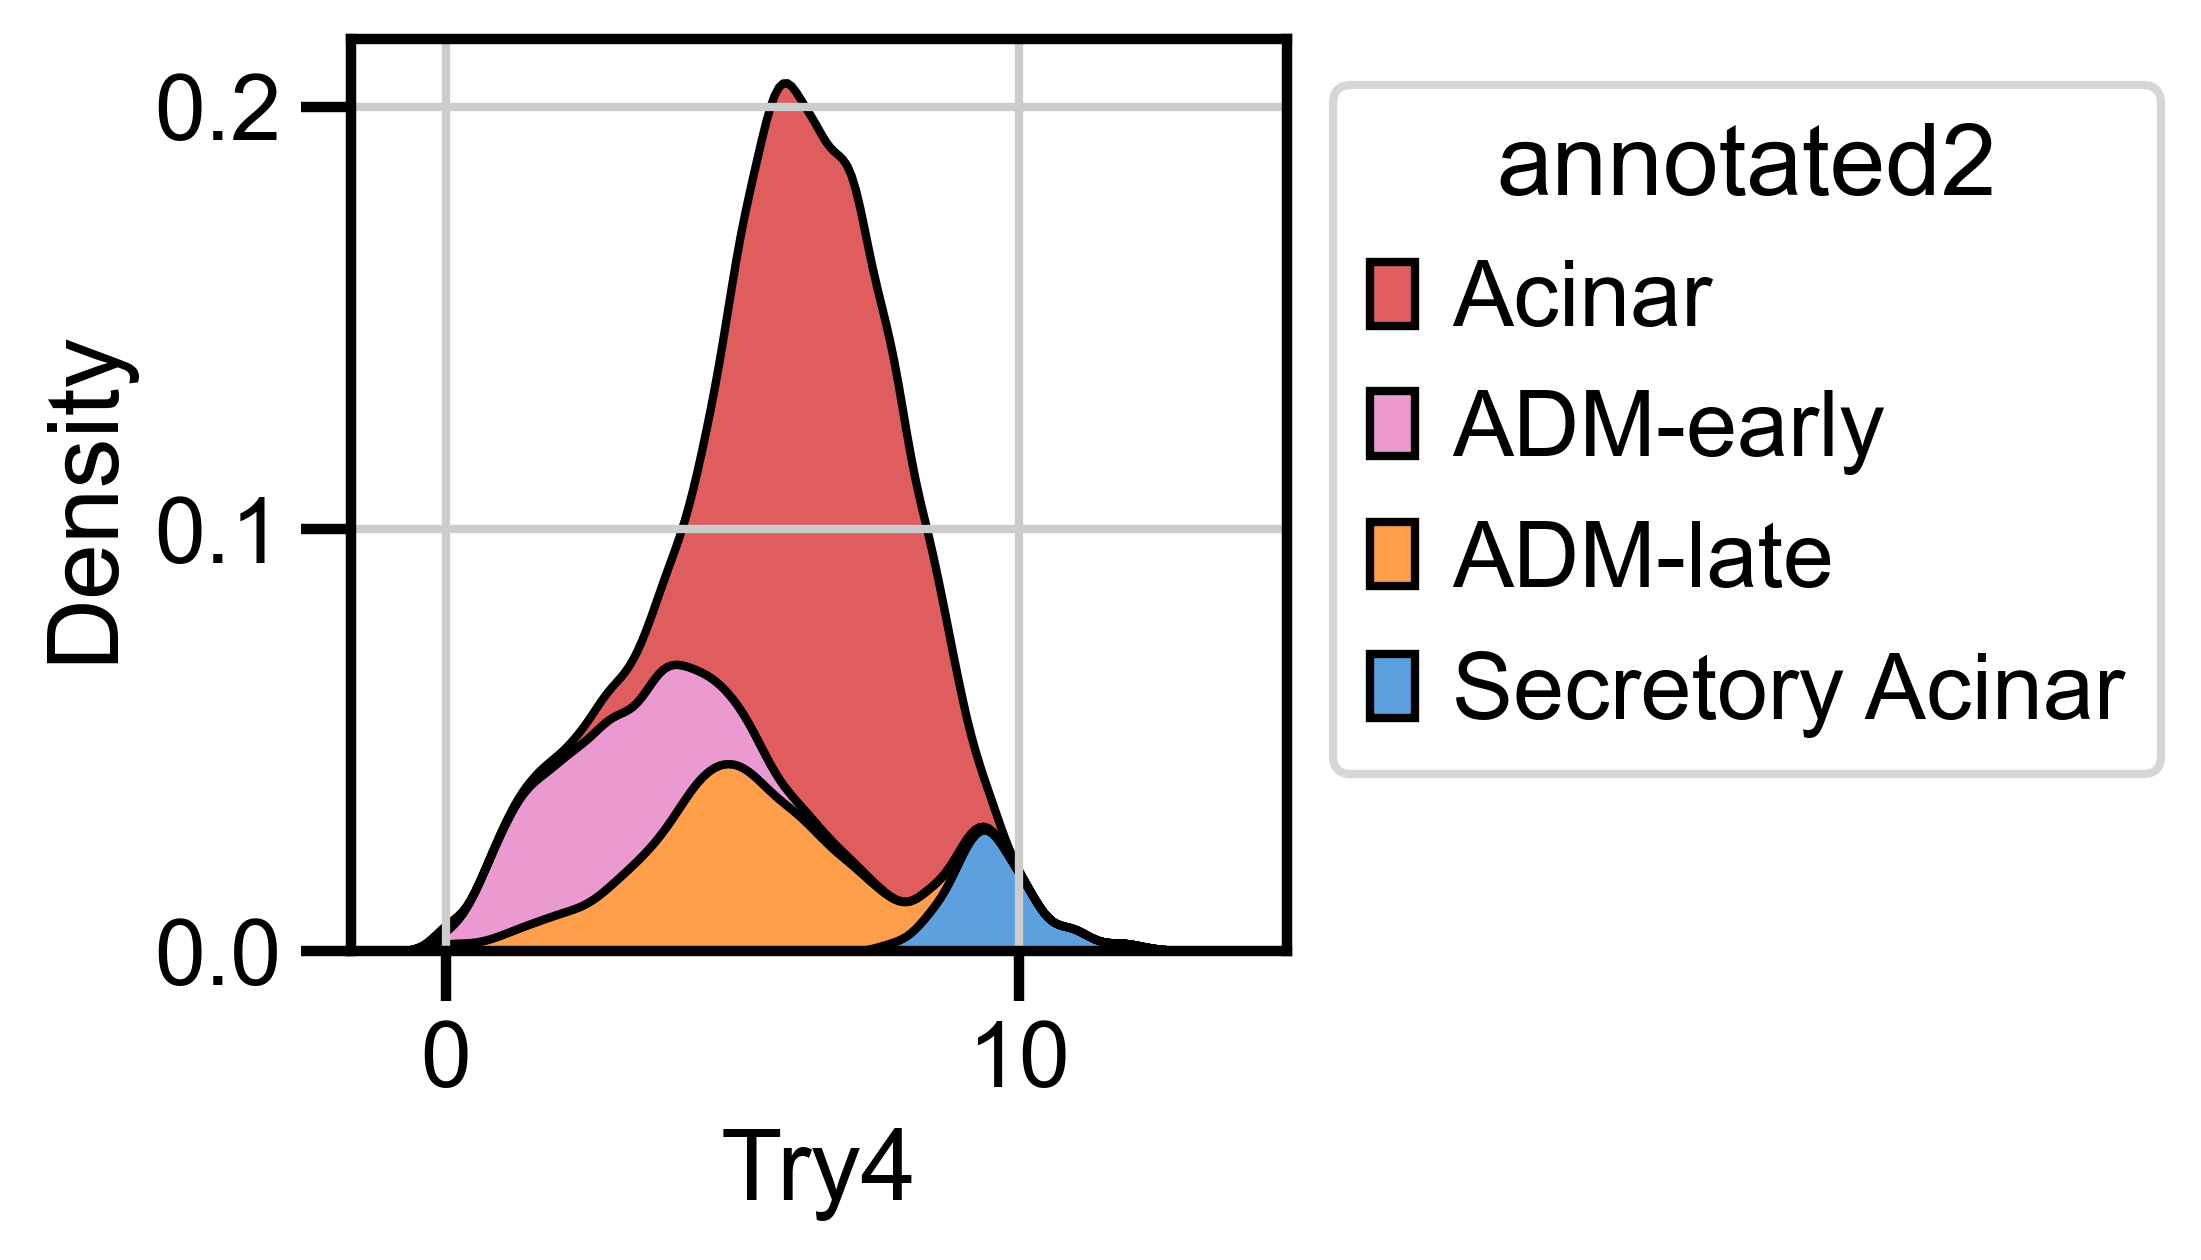

In [ ]:
ax=sns.kdeplot(data=df_genes, x='Try4', hue='annotated2', palette=colors,multiple='stack')

# Move the legend outside the figure
sns.move_legend(ax, loc='upper left',bbox_to_anchor=(1, 1))

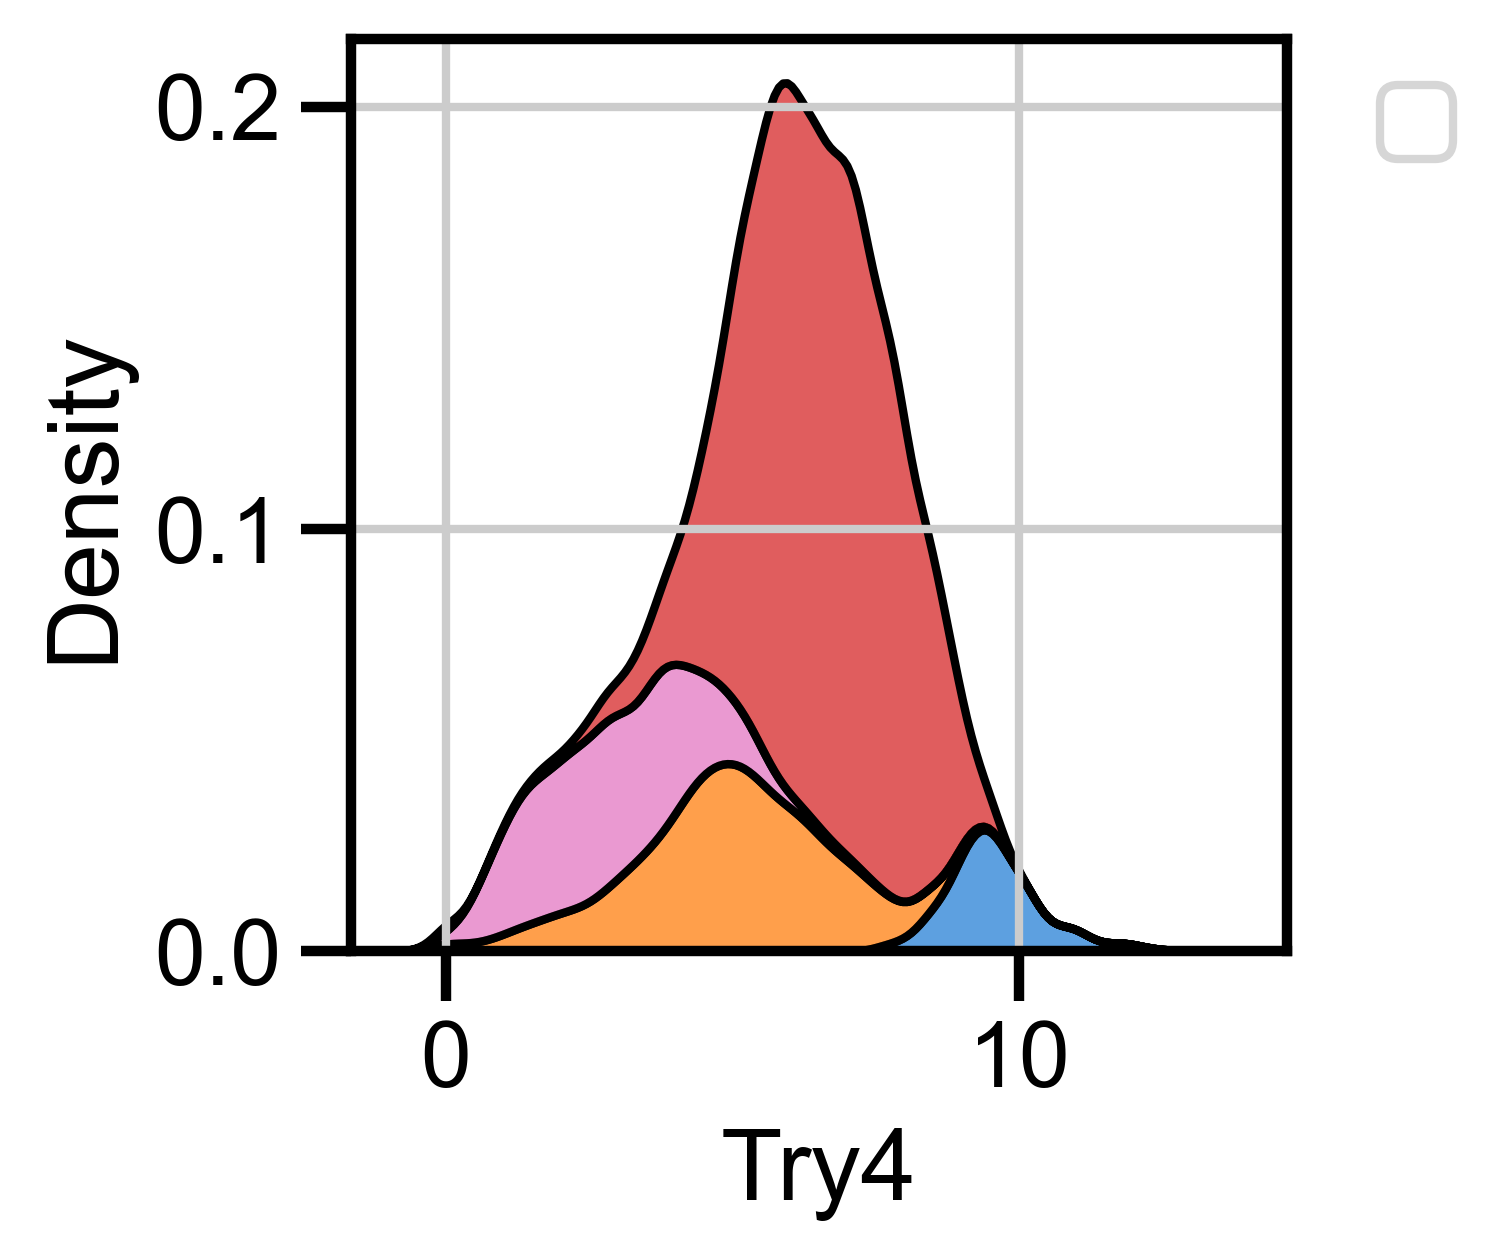

In [ ]:
ax=sns.kdeplot(data=df_genes, x='Try4', hue='annotated2', palette=colors,multiple='stack')
# Move the legend outside the figure
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#run scVelo on Acinar

##scVelo -- spliced double normalized
###redo neighbors before moments/dynamics

In [ ]:
adata.X=adata.layers['spliced']
proportional_fitting = sc.pp.normalize_total(adata, target_sum=None, inplace=False)

In [ ]:
adata.layers["spliced_log1pPF_normalization"] = sc.pp.log1p(proportional_fitting["X"])
adata.layers["spliced"] = sc.pp.normalize_total(adata, target_sum=None, layer="spliced_log1pPF_normalization", inplace=False)["X"]

In [ ]:
adata.X=adata.layers['unspliced']
proportional_fitting = sc.pp.normalize_total(adata, target_sum=None, inplace=False)

In [ ]:
adata.layers["unspliced_log1pPF_normalization"] = sc.pp.log1p(proportional_fitting["X"])
adata.layers["unspliced"] = sc.pp.normalize_total(adata, target_sum=None, layer="unspliced_log1pPF_normalization", inplace=False)["X"]

In [ ]:
adata.X=adata.layers["unspliced"]

In [ ]:
# check the top rows of data matrix on X
adata.X=adata.layers["spliced"]

In [ ]:
#reran neighbors because of error above: Your neighbor graph seems to be corrupted. Consider recomputing via pp.neighbors.
sc.pp.neighbors(adata, n_pcs=30,n_neighbors=15,random_state=42)

In [ ]:
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

In [ ]:
scv.tl.recover_dynamics(adata,n_jobs=8)

recovering dynamics (using 8/8 cores)


  0%|          | 0/202 [00:00<?, ?gene/s]

    finished (0:02:59) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


In [ ]:
#Estimation of RNA velocity using model's inferred splicing kinetics
%%time
scv.tl.velocity(adata, mode='dynamical',filter_genes=False,use_raw=False,use_highly_variabl=True)
scv.tl.velocity_graph(adata)

computing velocities
    finished (0:00:08) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/8 cores)


  0%|          | 0/15333 [00:00<?, ?cells/s]

    finished (0:00:16) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
CPU times: user 18.8 s, sys: 5.04 s, total: 23.8 s
Wall time: 24.6 s


In [ ]:
adata.write(samplename+'_acinar_velocity_annotated_20230415.h5ad')

#Spliced and unspliced plots

In [ ]:
genes=["Ctrb1","Cela3b","Prss2","Cela1","Try4"]

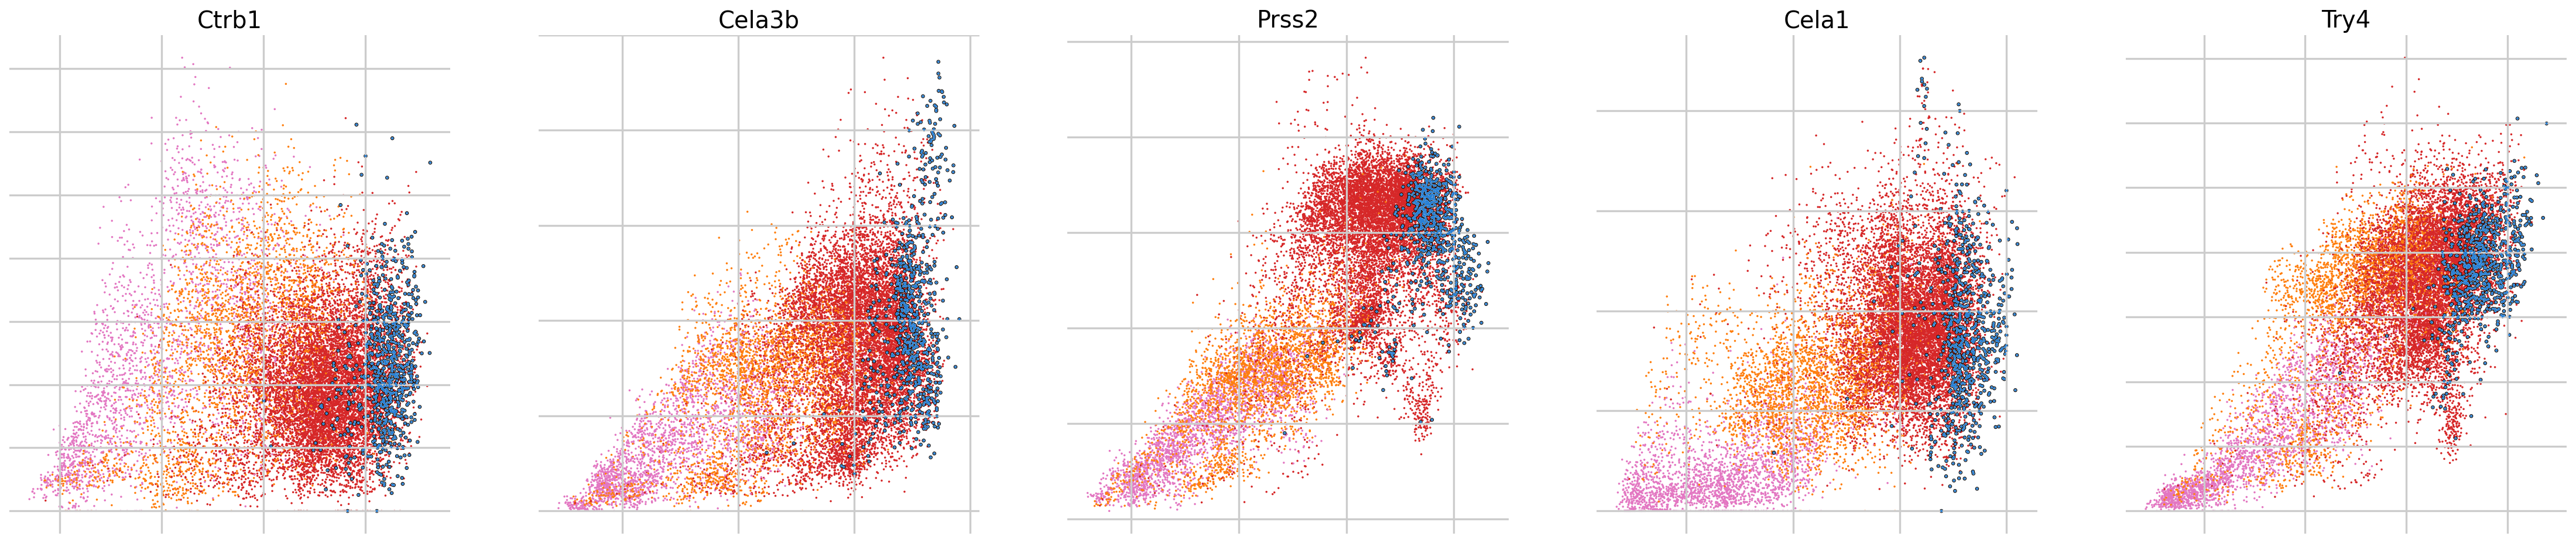

In [ ]:
kwargs = dict(size=10, linewidth=1.5,add_outline='Secretory Acinar')
scv.pl.scatter(adata, genes, ncols=5, frameon=False, color='annotated2',**kwargs)